In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [3]:
data =pd.read_csv("/content/framingham_2.csv")

In [4]:
col= data.shape[1]
row= data.shape[0]
print(f"No of rows: {row}")
print(f"No of columns: {col}")

No of rows: 5000
No of columns: 16


In [5]:
# Convert 'education' and 'cigsPerDay' to integer type
data['education'] = data['education'].astype('Int64')
data['cigsPerDay'] = data['cigsPerDay'].astype('Int64')
data['BPMeds'] = data['BPMeds'].astype('Int64')

# Verify the changes
print(data.dtypes[['education', 'cigsPerDay','BPMeds']])

education     Int64
cigsPerDay    Int64
BPMeds        Int64
dtype: object


In [6]:
# checking the missing values
data.isnull().sum()

,0
male,0
age,0
education,102
currentSmoker,0
cigsPerDay,27
BPMeds,50
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,5000.000000,5000.000000,4898.0,5000.000000,4973.0,4950.0,5000.000000,5000.000000,5000.000000,4950.000000,5000.000000,5000.000000,4982.000000,4999.000000,4617.000000,5000.00000
mean,0.496200,51.429600,1.926501,0.508400,9.810175,0.03798,0.009800,0.378600,0.026800,238.594949,136.156100,84.259800,26.084360,75.942789,81.538228,0.50000
std,0.500036,8.589633,1.043425,0.499979,12.260783,0.191167,0.098519,0.485087,0.161515,40.863727,23.314058,12.849215,4.194481,12.136212,18.740159,0.50005
min,0.000000,33.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.00000
25%,0.000000,44.000000,1.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,210.000000,120.000000,75.000000,23.292500,67.000000,71.000000,0.00000
50%,0.000000,51.000000,2.0,1.000000,1.0,0.0,0.000000,0.000000,0.000000,238.000000,132.000000,83.000000,25.690000,75.000000,78.000000,0.50000
75%,1.000000,59.000000,3.0,1.000000,20.0,0.0,0.000000,1.000000,0.000000,266.000000,149.000000,92.000000,28.437500,83.000000,87.000000,1.00000
max,1.000000,70.000000,4.0,1.000000,43.0,1.0,1.000000,1.000000,1.000000,352.000000,232.000000,140.000000,56.800000,143.000000,235.000000,1.00000


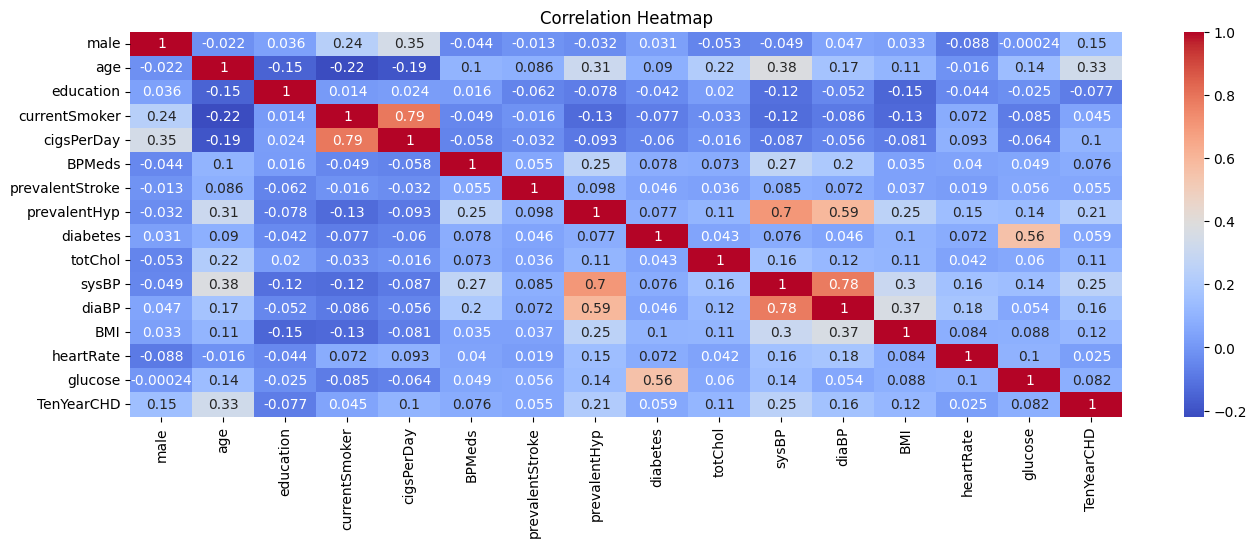

In [8]:
plt.figure(figsize=(16,5))
plt.subplot()
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
'''User-defined function to derive more insight from the data
here we divide the age into categories:
if a person having age less then or equal to 40 return 0,
if a person having age more then 40 and less then equal to 55 then return 1
else return 2
'''

#Age encoding
def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2

''' here we divide the heart_rate into categories:
if a person's heart rate is less then or equal to 60 return 0,
if a person having age more then 60 and less then equal to 100 then return 1
else return 2
'''

#heart rate encoder
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2


In [10]:
#applying functions
data['enc_hr'] = data['heartRate'].apply(heartrate_enc)
data['encode_age'] = data['age'].apply(encode_age)

<ipython-input-11-1053412415>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['encode_age'], palette='coolwarm')


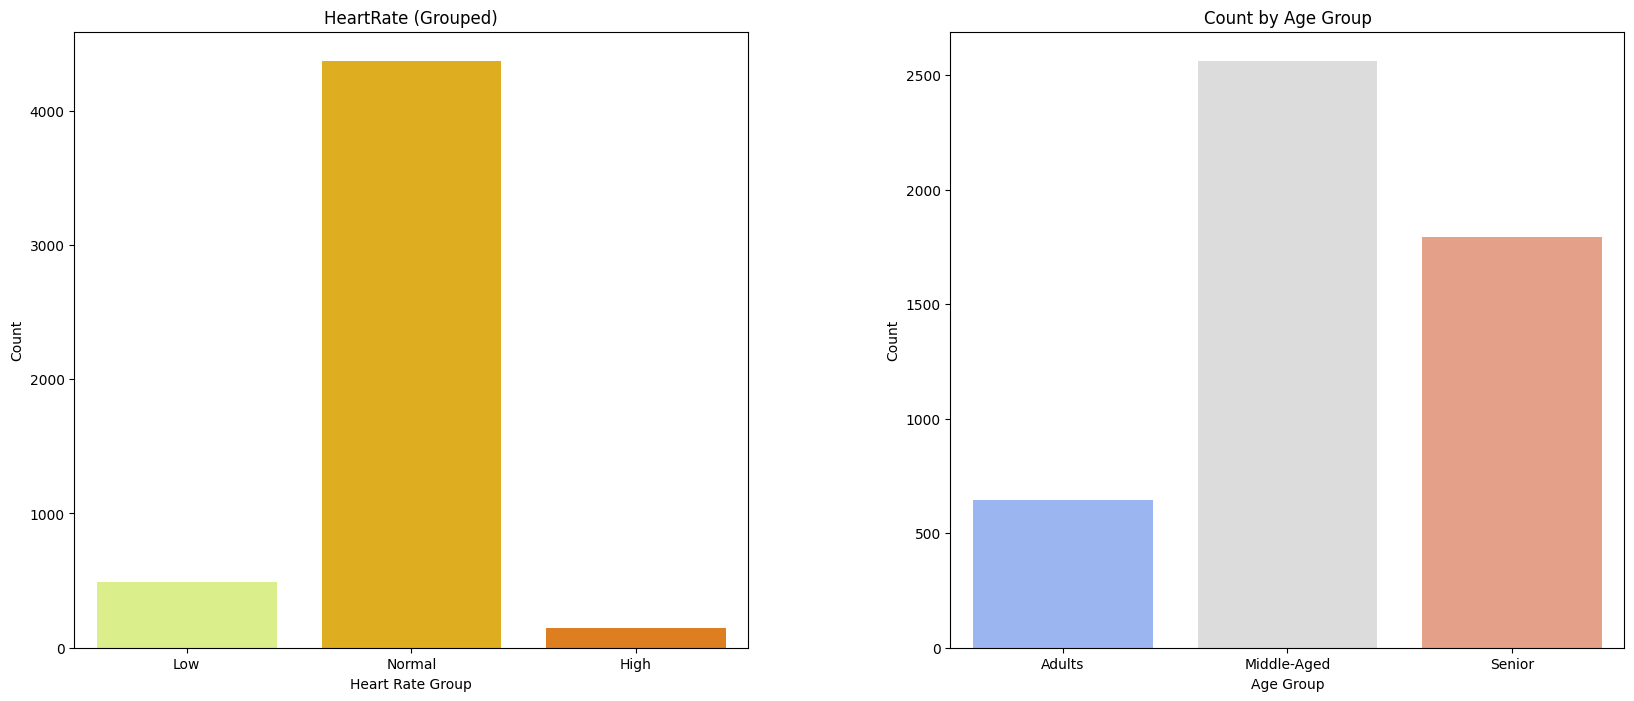

In [11]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# First subplot: Heart Rate Grouped
plt.subplot(1, 2, 1)
sns.countplot(x=data['enc_hr'], hue=data['enc_hr'], palette='Wistia', legend=False)
plt.xlabel('Heart Rate Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Normal', 'High'])
plt.title('HeartRate (Grouped)')

# Second subplot: Count by Age Group
plt.subplot(1, 2, 2)
sns.countplot(x=data['encode_age'], palette='coolwarm')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

plt.show()

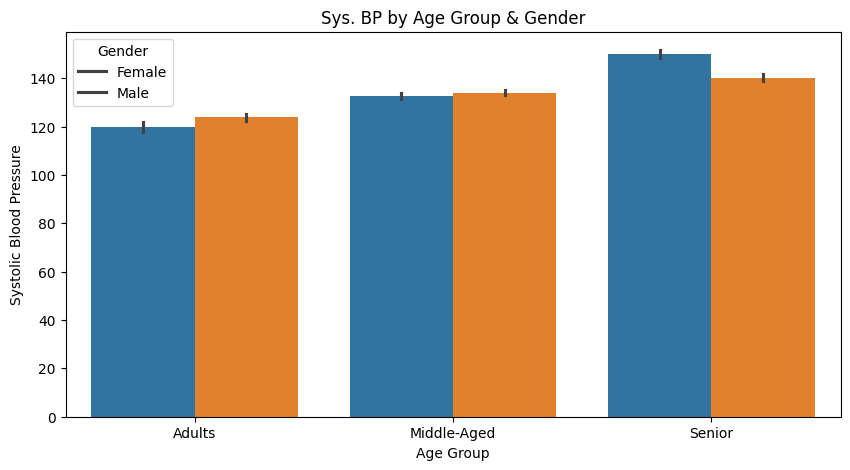

In [12]:
# Sys. BP by Age Group & Gender'

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.barplot(x='encode_age', y='sysBP', hue='male', data=data)
plt.xlabel('Age Group')
plt.ylabel('Systolic Blood Pressure')
plt.xticks(ticks=[0, 1, 2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

<ipython-input-13-2529090245>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['encode_age'], palette=['red', 'green', 'blue']) # Change palette here


Text(0.5, 1.0, 'Count by Age Group')

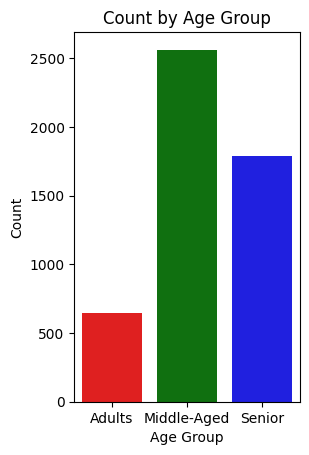

In [13]:
# Second subplot: Count by Age Group
plt.subplot(1, 2, 2)
sns.countplot(x=data['encode_age'], palette=['red', 'green', 'blue']) # Change palette here
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')


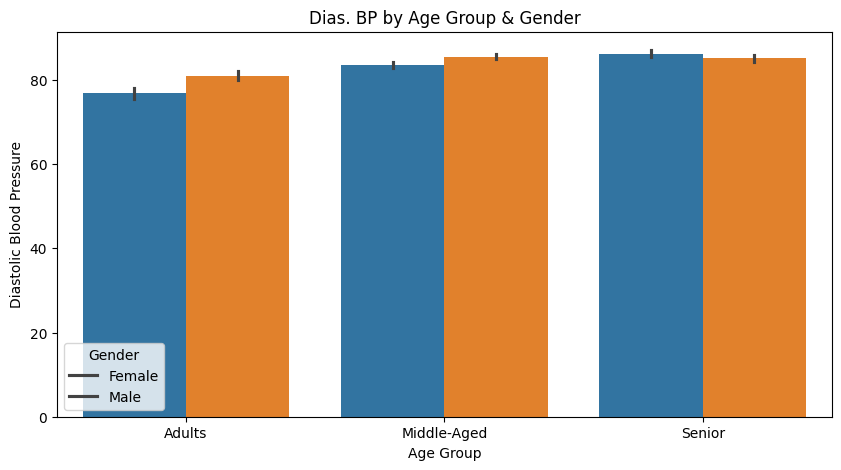

In [14]:
#dias. BP by Age Group & Gender'

plt.figure(figsize=(10, 5))
sns.barplot(x='encode_age', y='diaBP', hue='male', data=data)
plt.xlabel('Age Group')
plt.ylabel('Diastolic Blood Pressure')
plt.xticks(ticks=[0, 1, 2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dias. BP by Age Group & Gender')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

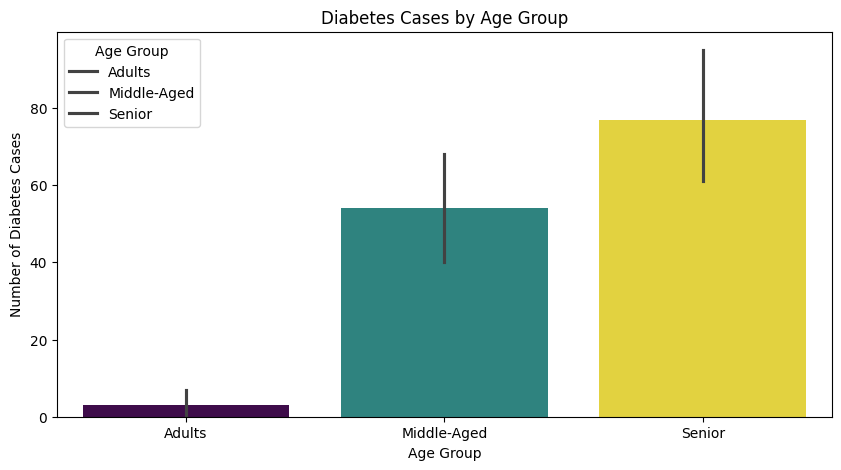

In [15]:
# prompt: #Diabetes by Age Group


plt.figure(figsize=(10, 5))
sns.barplot(x='encode_age', y='diabetes', hue='encode_age', data=data, palette='viridis', estimator=np.sum)
plt.xlabel('Age Group')
plt.ylabel('Number of Diabetes Cases')
plt.xticks(ticks=[0, 1, 2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Diabetes Cases by Age Group')
plt.legend(title='Age Group', labels=['Adults', 'Middle-Aged', 'Senior'])
plt.show()

<ipython-input-16-17486473>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cigsPerDay"])
<ipython-input-16-17486473>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["glucose"])
<ipython-input-16-17486473>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in 

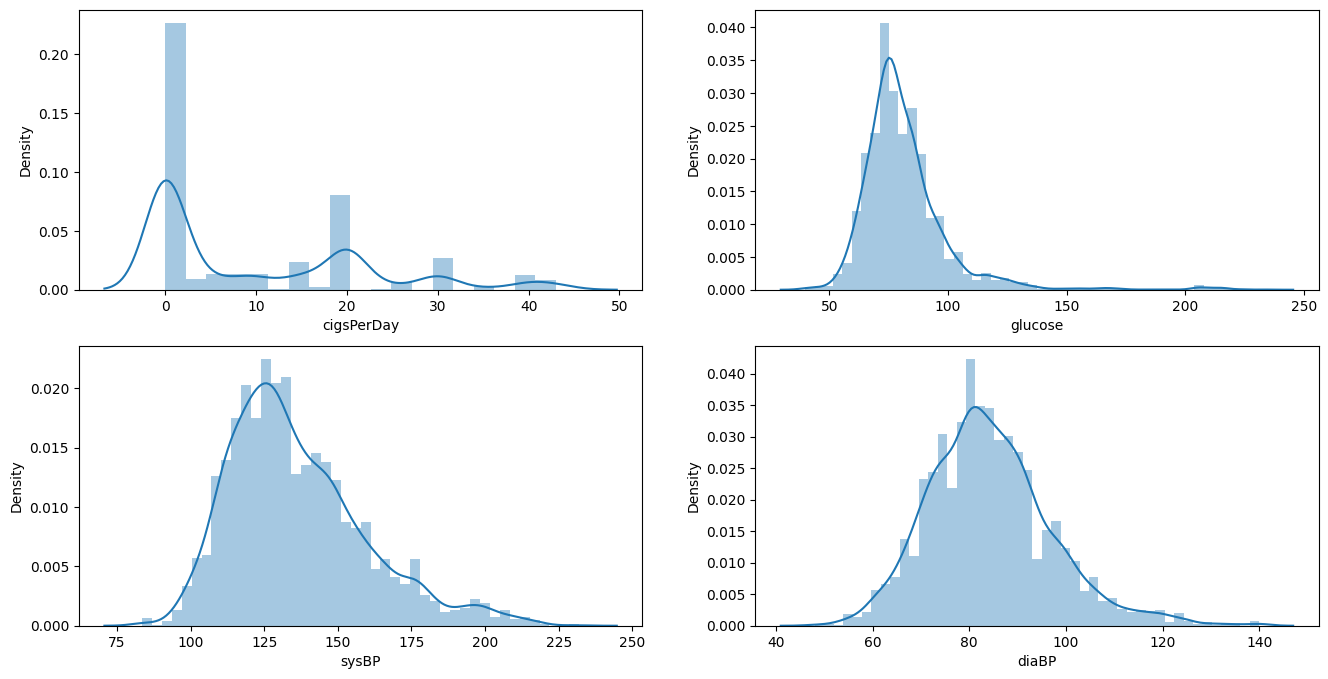

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data["cigsPerDay"])

plt.subplot(2,2,2)
sns.distplot(data["glucose"])

plt.subplot(2,2,3)
sns.distplot(data["sysBP"])

plt.subplot(2,2,4)
sns.distplot(data["diaBP"])


plt.show()

<ipython-input-17-2197499398>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])
<ipython-input-17-2197499398>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["BMI"])
<ipython-input-17-2197499398>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

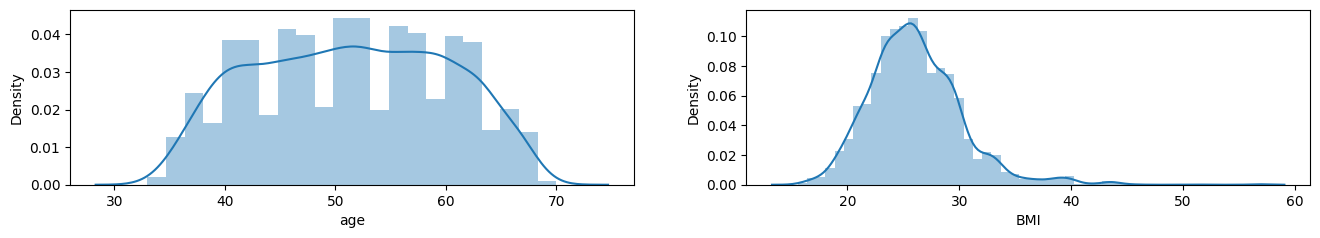

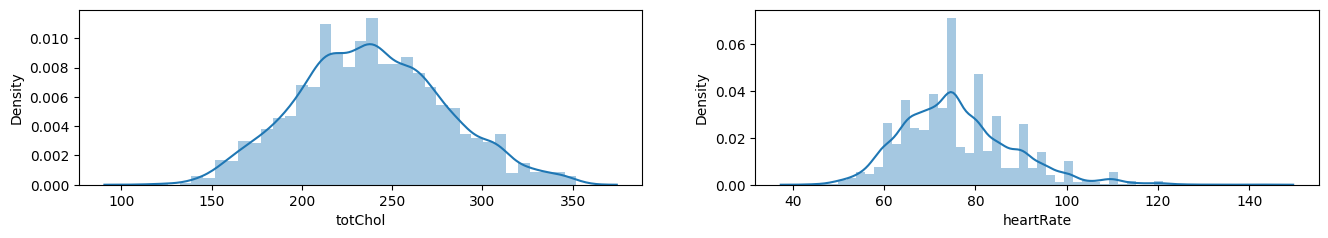

In [17]:
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(data["age"])

plt.subplot(2,2,2)
sns.distplot(data["BMI"])

plt.figure(figsize=(16,5))
plt.subplot(2,2,3)
sns.distplot(data["totChol"])

plt.subplot(2,2,4)
sns.distplot(data["heartRate"])
plt.show()

In [18]:
''' Data Transformation
replace neumarical columns with mean and categorical columns with median
'''

def impute_mean(data):
    return data.fillna(data.mean())


In [19]:
# Data Transformation
def impute_median(data):
    return data.fillna(data.median())

In [20]:
data['glucose'] = data['glucose'].transform(impute_mean)
data['education'] = data['education'].transform(impute_median)
data['heartRate'] = data['heartRate'].transform(impute_mean)
data['totChol'] = data['totChol'].transform(impute_mean)
data['BPMeds'] = data['BPMeds'].transform(impute_median)
data['cigsPerDay'] = data['cigsPerDay'].transform(impute_median)
data['BMI'] = data['BMI'].transform(impute_mean)

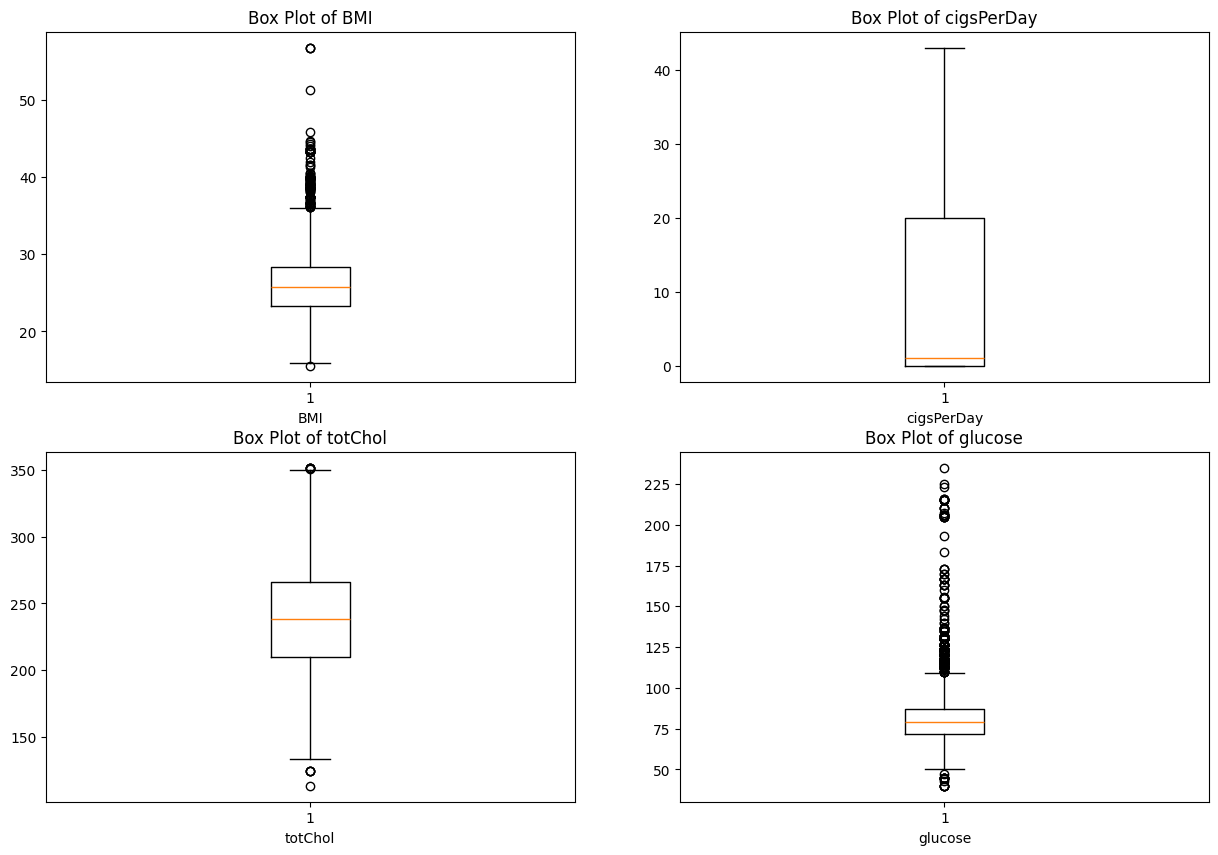

In [21]:
cols_to_plot = ['BMI', 'cigsPerDay', 'totChol', 'glucose']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data[col].dropna())  # dropna() to handle any missing values
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

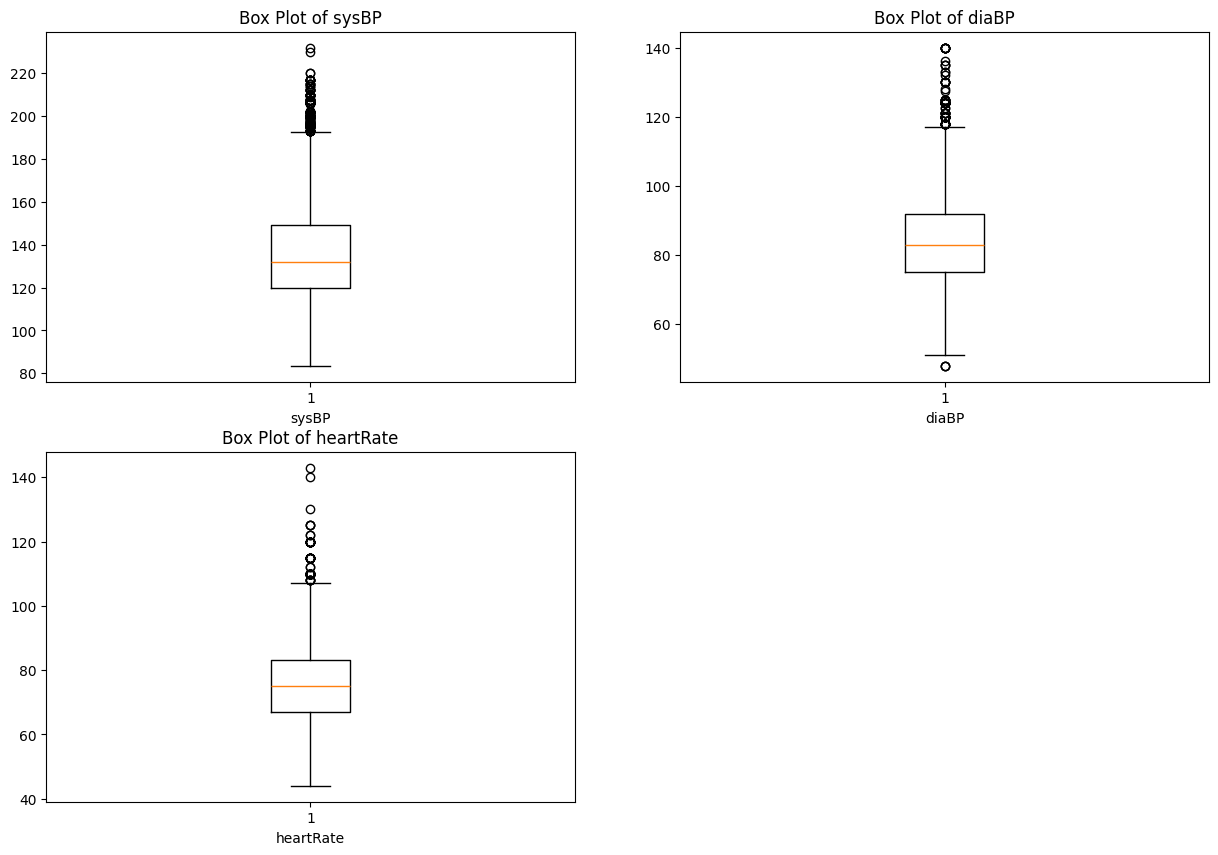

In [22]:
cols_to_plot = ['sysBP','diaBP','heartRate']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)


<ipython-input-23-1412110535>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=data, palette='pastel')


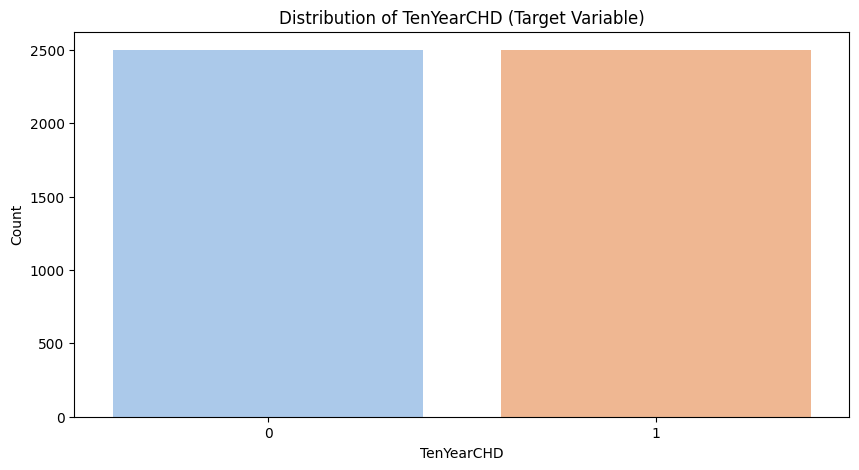

TenYearCHD
0    2500
1    2500
Name: count, dtype: int64


In [23]:
#checking the unbalancing of the target columns
plt.figure(figsize=(10, 5))
sns.countplot(x='TenYearCHD', data=data, palette='pastel')
plt.title('Distribution of TenYearCHD (Target Variable)')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

# Print the value counts for the target variable
print(data['TenYearCHD'].value_counts())

In [24]:
data_copy = data.copy()

In [25]:
data_copy

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,enc_hr,encode_age
0,1,47,1,1,30,0,0,0,0,277.0,137.0,86.0,26.25,75.0,85.0,0,1,1
1,1,37,4,0,0,0,0,0,0,266.0,110.0,72.5,26.09,77.0,73.0,1,1,0
2,1,43,1,1,20,0,0,0,0,180.0,131.0,92.0,27.18,65.0,85.0,1,1,1
3,1,46,3,0,0,0,0,0,0,216.0,124.0,85.0,29.91,100.0,103.0,0,1,1
4,0,47,2,1,6,0,0,0,0,234.0,128.0,91.0,25.59,80.0,93.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,41,2,1,20,0,0,0,0,199.0,139.0,80.0,25.51,62.0,62.0,1,1,1
4996,0,44,2,1,20,0,0,0,0,243.0,129.0,88.0,30.85,90.0,83.0,0,1,1
4997,1,51,4,1,30,0,0,0,0,342.0,110.0,70.0,28.86,72.0,87.0,1,1,1
4998,0,58,1,1,15,0,0,1,0,275.0,140.0,78.0,19.18,78.0,74.0,1,1,2


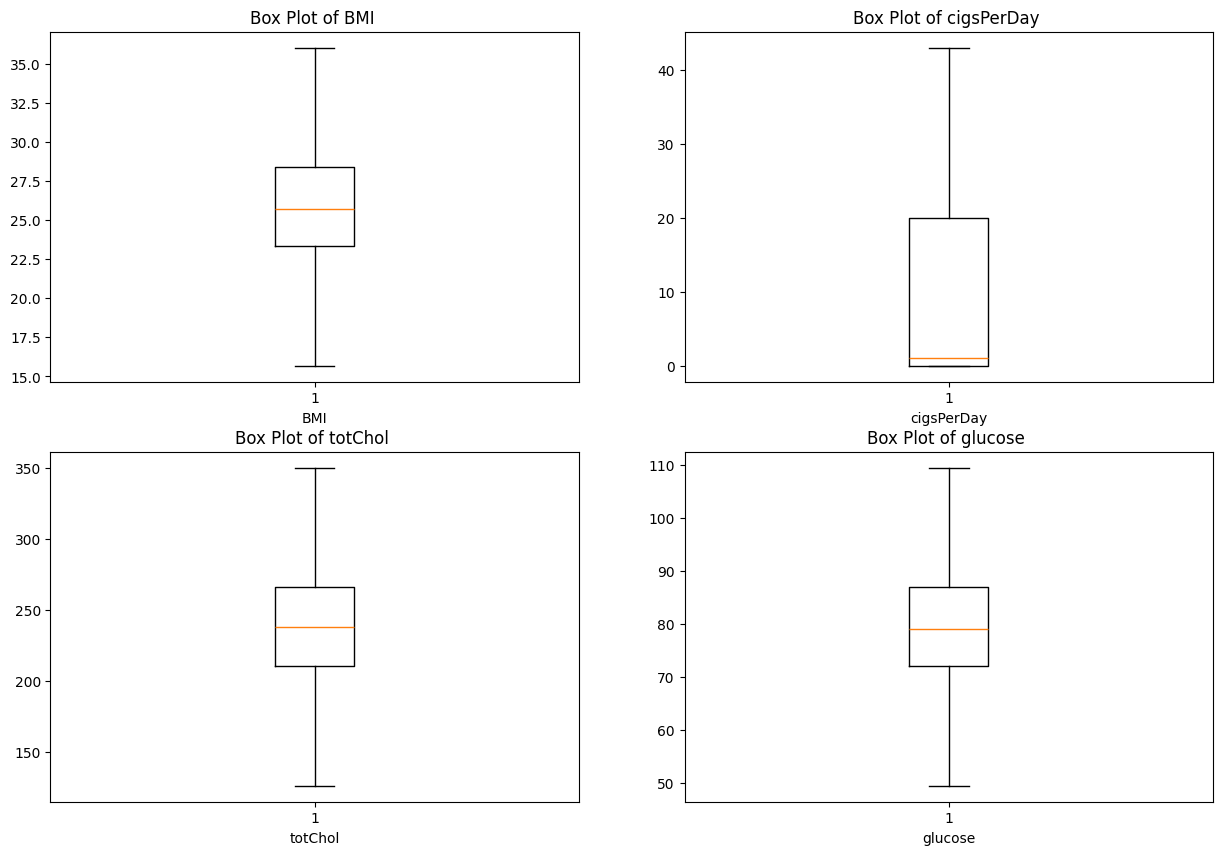

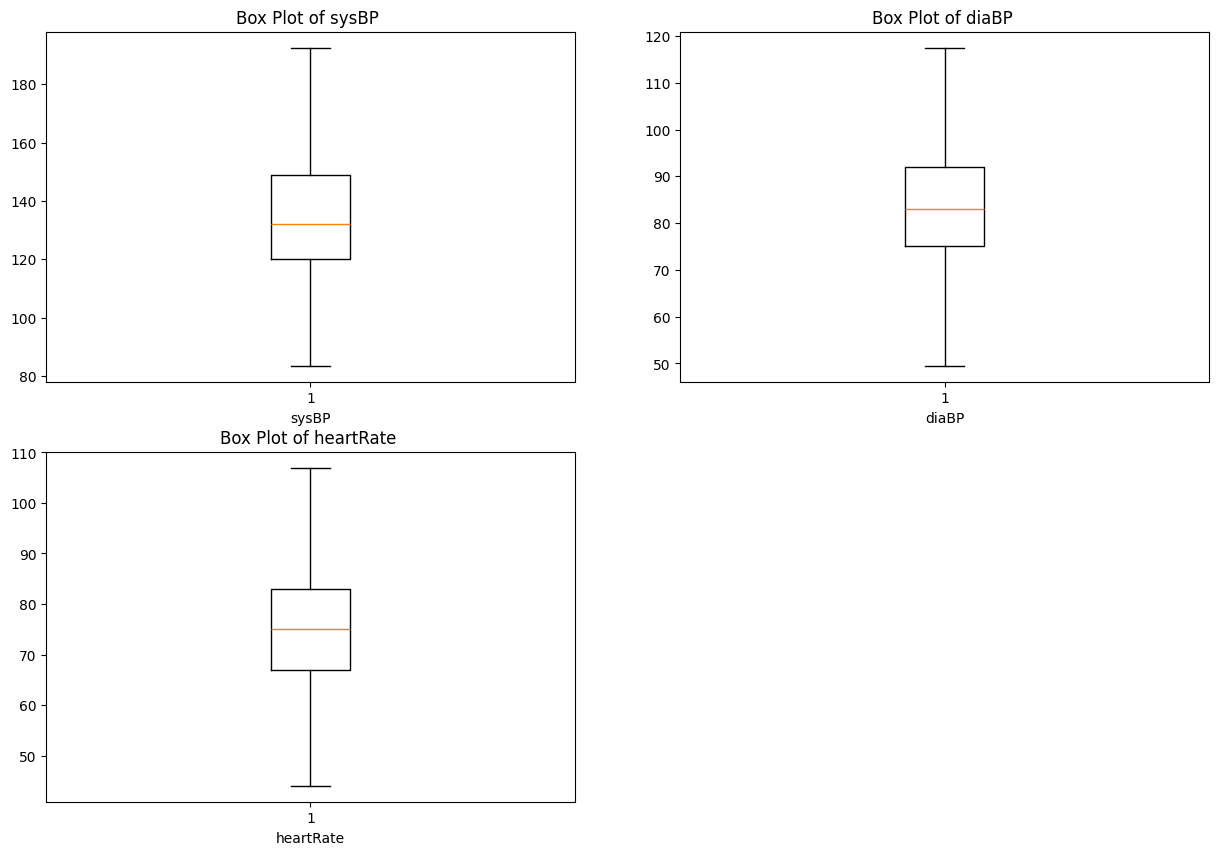

In [26]:
import matplotlib.pyplot as plt
import numpy as np
col = ['BMI', 'cigsPerDay', 'totChol', 'glucose','sysBP','diaBP','heartRate']

for c in col:
    Q1 = data_copy[c].quantile(0.25)
    Q3 = data_copy[c].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    data_copy[c] = np.where(data_copy[c] < lower_bound, lower_bound, data_copy[c])
    data_copy[c] = np.where(data_copy[c] > upper_bound, upper_bound, data_copy[c])


# Optional: Verify the changes by replotting box plots
cols_to_plot = ['BMI', 'cigsPerDay', 'totChol', 'glucose']
plt.figure(figsize=(15, 10))

for i, c in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data_copy[c].dropna())
    plt.title(f'Box Plot of {c} ')
    plt.xlabel(c)

cols_to_plot = ['sysBP','diaBP','heartRate']
plt.figure(figsize=(15, 10))

for i, c in enumerate(cols_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(data_copy[c].dropna())
    plt.title(f'Box Plot of {c} ')
    plt.xlabel(c)

plt.show()

In [27]:
# removing column
data_copy = data_copy.drop(columns=['education','enc_hr','encode_age'],axis=1 )

In [28]:

from sklearn.feature_selection import SelectKBest, f_classif

x = data_copy.drop('TenYearCHD', axis=1)
y = data_copy['TenYearCHD']

k = 10
selector = SelectKBest(score_func=f_classif, k=k)

# Fit the selector to your data
selector.fit(x, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = x.columns[selected_feature_indices]

print(f"Selected {k} features based on f_classif:")
print(selected_features)

x_selected = x[selected_features]

# Print the first few rows of the new DataFrame with selected features
print("\nDataFrame with selected features:")
print(x_selected.head())

Selected 10 features based on f_classif:
Index(['male', 'age', 'cigsPerDay', 'BPMeds', 'prevalentHyp', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI'],
      dtype='object')

DataFrame with selected features:
   male  age  cigsPerDay  BPMeds  prevalentHyp  diabetes  totChol  sysBP  \
0     1   47        30.0       0             0         0    277.0  137.0   
1     1   37         0.0       0             0         0    266.0  110.0   
2     1   43        20.0       0             0         0    180.0  131.0   
3     1   46         0.0       0             0         0    216.0  124.0   
4     0   47         6.0       0             0         0    234.0  128.0   

   diaBP    BMI  
0   86.0  26.25  
1   72.5  26.09  
2   92.0  27.18  
3   85.0  29.91  
4   91.0  25.59  


In [29]:

# Split the data into training and testing sets using the selected features
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size=0.2, random_state=42, stratify=y)


Training phase

In [30]:
# prompt: i want to train the logistic regression on the training data and also fullfill the requirment like standardization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model on the scaled training data
lr.fit(x_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = lr.predict(x_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.655
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.63      0.65       500
           1       0.65      0.68      0.66       500

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.66      0.66      0.65      1000

Confusion Matrix:
 [[317 183]
 [162 338]]


In [31]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
print("\n--- Training SVM with data ---")
svm = SVC(random_state=42)
# Train on SMOTE data
svm.fit(x_train, y_train)
# Predict on scaled test data
y_pred_svm = svm.predict(x_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm)
svm_cm = confusion_matrix(y_test, y_pred_svm)



print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Classification Report:\n{svm_report}")
print(f"SVM Confusion Matrix:\n{svm_cm}")



--- Training SVM with data ---
SVM Accuracy: 0.6710
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       500
           1       0.66      0.72      0.69       500

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.67      0.67      0.67      1000

SVM Confusion Matrix:
[[313 187]
 [142 358]]


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# --- Gradient Boosting Classifier ---
print("\n--- Training Gradient Boosting with data ---")
gb = GradientBoostingClassifier(random_state=42)
# Train on SMOTE data (using resampled variable names)
gb.fit(x_train, y_train)
# Predict on original test data (using scaled variable names)
y_pred_gb = gb.predict(x_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_report = classification_report(y_test, y_pred_gb)
gb_cm = confusion_matrix(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"Gradient Boosting Classification Report:\n{gb_report}")
print(f"Gradient Boosting Confusion Matrix:\n{gb_cm}")



--- Training Gradient Boosting with data ---
Gradient Boosting Accuracy: 0.7210
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       500
           1       0.70      0.78      0.74       500

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000

Gradient Boosting Confusion Matrix:
[[330 170]
 [109 391]]


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# --- Decision Tree Classifier ---
print("\n--- Training Decision Tree with data ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train) # Train on SMOTE data
y_pred_dt = dt.predict(x_test) # Predict on original test data
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_report = classification_report(y_test, y_pred_dt)
dt_cm = confusion_matrix(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Classification Report:\n{dt_report}")
print(f"Decision Tree Confusion Matrix:\n{dt_cm}")




--- Training Decision Tree with data ---
Decision Tree Accuracy: 0.9030
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       500
           1       0.85      0.98      0.91       500

    accuracy                           0.90      1000
   macro avg       0.91      0.90      0.90      1000
weighted avg       0.91      0.90      0.90      1000

Decision Tree Confusion Matrix:
[[414  86]
 [ 11 489]]


In [34]:
# --- K-Nearest Neighbors Classifier ---
print("\n--- Training KNN with data ---")
# Choosing a reasonable k, e.g., 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train) # Train on SMOTE data
y_pred_knn = knn.predict(x_test) # Predict on original test data
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn)
knn_cm = confusion_matrix(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Classification Report:\n{knn_report}")
print(f"KNN Confusion Matrix:\n{knn_cm}")


--- Training KNN with data ---
KNN Accuracy: 0.7600
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.66      0.73       500
           1       0.72      0.86      0.78       500

    accuracy                           0.76      1000
   macro avg       0.77      0.76      0.76      1000
weighted avg       0.77      0.76      0.76      1000

KNN Confusion Matrix:
[[330 170]
 [ 70 430]]


In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# --- Gradient Boosting Classifier ---
print("\n--- Training Gradient Boosting with SMOTE data ---")
gb_test = GradientBoostingClassifier(random_state=42)
# Train on SMOTE data (using resampled variable names)
gb_test.fit(x_test, y_test)
# Predict on original test data (using scaled variable names)
y_pred_gb = gb_test.predict(x_train)
gb_accuracy = accuracy_score(y_train, y_pred_gb)
gb_report = classification_report(y_train, y_pred_gb)
gb_cm = confusion_matrix(y_train, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print(f"Gradient Boosting Classification Report:\n{gb_report}")
print(f"Gradient Boosting Confusion Matrix:\n{gb_cm}")



--- Training Gradient Boosting with SMOTE data ---
Gradient Boosting Accuracy: 0.7200
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.69      0.71      2000
           1       0.71      0.76      0.73      2000

    accuracy                           0.72      4000
   macro avg       0.72      0.72      0.72      4000
weighted avg       0.72      0.72      0.72      4000

Gradient Boosting Confusion Matrix:
[[1370  630]
 [ 490 1510]]


Testing phase

In [36]:
print("\n ---Testing on the data---")
# Initialize the Logistic Regression model
lr_test = LogisticRegression(random_state=42) # This line is commented out as it is not needed for evaluation of lr

# Test the model on the scaled training data
lr_test.fit(x_test_scaled, y_test) # This line is commented out as it is incorrect workflow

# Make predictions on the scaled testing data
y_pred = lr_test.predict(x_train_scaled) # This line is commented out as it is incorrect workflow

# Evaluate the model
print("Accuracy:", accuracy_score(y_train, y_pred)) # This line is commented out as it is incorrect workflow
print("Classification Report:\n", classification_report(y_train, y_pred)) # This line is commented out as it is incorrect workflow
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred)) # This line is commented out as it is incorrect workflow



 ---Testing on the data---
Accuracy: 0.6845
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68      2000
           1       0.68      0.69      0.69      2000

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.68      0.68      0.68      4000

Confusion Matrix:
 [[1352  648]
 [ 614 1386]]


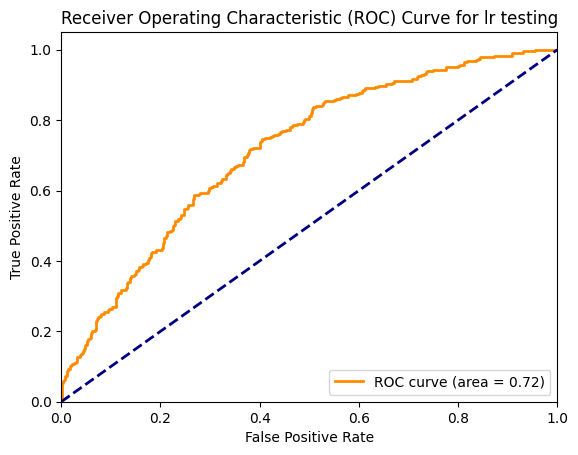

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_pred_proba = lr.predict_proba(x_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for lr testing')
plt.legend(loc="lower right")
plt.show()


In [38]:
from sklearn.svm import SVC

# Support Vector Machine (SVM)
print("\n--- Testing SVM with data ---")
svm_test = SVC(random_state=42)
# Train on SMOTE data
svm_test.fit(x_test, y_test)
# Predict on scaled test data
y_pred_svm = svm_test.predict(x_train)
svm_accuracy = accuracy_score(y_train, y_pred_svm)
svm_report = classification_report(y_train, y_pred_svm)
svm_cm = confusion_matrix(y_train, y_pred_svm)



print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"SVM Classification Report:\n{svm_report}")
print(f"SVM Confusion Matrix:\n{svm_cm}")



--- Testing SVM with data ---
SVM Accuracy: 0.6492
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.65      2000
           1       0.65      0.66      0.65      2000

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000

SVM Confusion Matrix:
[[1278  722]
 [ 681 1319]]



--- Retraining SVM with probability=True for ROC curve ---


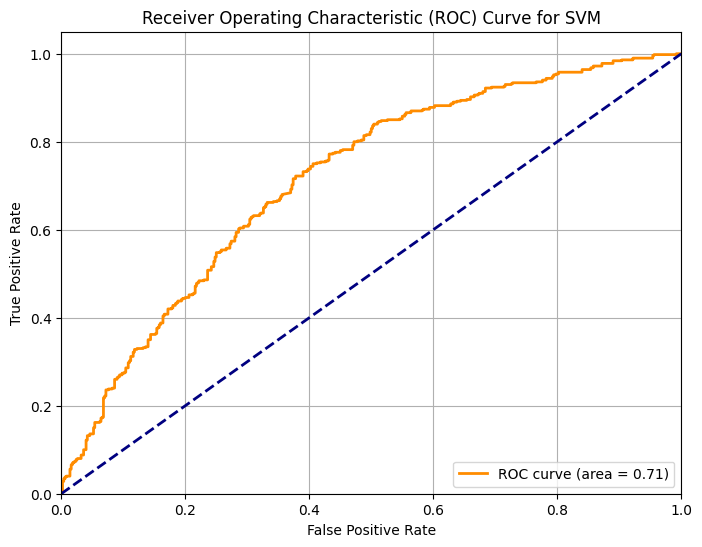

SVM ROC AUC: 0.7147


In [39]:
# prompt: closely analyze my project and i have fitted the svm above generate a roc curev for svm

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Since SVC with the default kernel (RBF) doesn't directly output probabilities,
# we need to train the SVM with `probability=True` to get predicted probabilities.
# Note: Setting `probability=True` can be computationally more expensive.

print("\n--- Retraining SVM with probability=True for ROC curve ---")
svm_prob = SVC(random_state=42, probability=True)
svm_prob.fit(x_train, y_train)

# Get predicted probabilities for the positive class (class 1) on the test set
y_pred_prob_svm = svm_prob.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"SVM ROC AUC: {roc_auc_svm:.4f}")

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# --- Decision Tree Classifier ---
print("\n--- Training Decision Tree with SMOTE data ---")
dt_test = DecisionTreeClassifier(random_state=42)
dt_test.fit(x_test, y_test) # Train on SMOTE data
y_pred_dt = dt_test.predict(x_train) # Predict on original test data
dt_accuracy = accuracy_score(y_train, y_pred_dt)
dt_report = classification_report(y_train, y_pred_dt)
dt_cm = confusion_matrix(y_train, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Classification Report:\n{dt_report}")
print(f"Decision Tree Confusion Matrix:\n{dt_cm}")




--- Training Decision Tree with SMOTE data ---
Decision Tree Accuracy: 0.7398
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      2000
           1       0.71      0.82      0.76      2000

    accuracy                           0.74      4000
   macro avg       0.75      0.74      0.74      4000
weighted avg       0.75      0.74      0.74      4000

Decision Tree Confusion Matrix:
[[1312  688]
 [ 353 1647]]


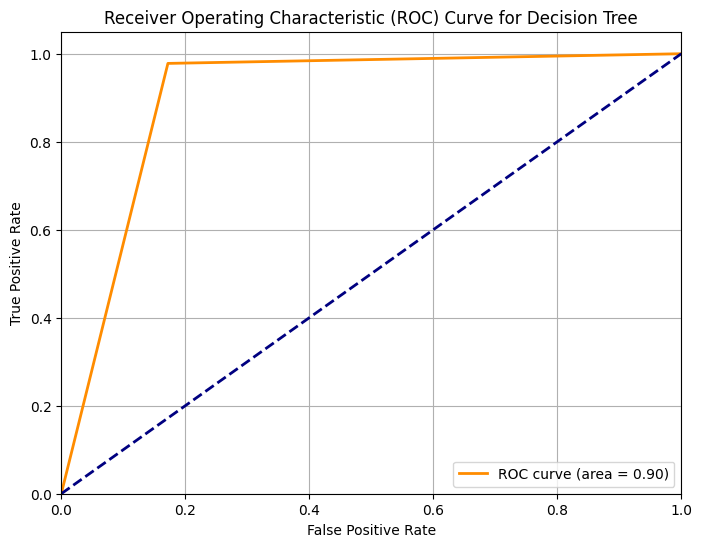

Decision Tree ROC AUC: 0.9030


In [41]:
# prompt: # prompt: closely analyze my project and i have fitted the dicisioin tree above generate a roc curev for decision tree

import matplotlib.pyplot as plt
# Get predicted probabilities for the positive class (class 1) on the test set
y_pred_prob_dt = dt.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for Decision Tree
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Decision Tree ROC AUC: {roc_auc_dt:.4f}")


In [42]:
# --- K-Nearest Neighbors Classifier ---
print("\n--- Testing KNN with data ---")
# Choosing a reasonable k, e.g., 5
knn_test = KNeighborsClassifier(n_neighbors=5)
knn_test.fit(x_test, y_test) # Train on SMOTE data
y_pred_knn = knn_test.predict(x_train) # Predict on original test data
knn_accuracy = accuracy_score(y_train, y_pred_knn)
knn_report = classification_report(y_train, y_pred_knn)
knn_cm = confusion_matrix(y_train, y_pred_knn)
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Classification Report:\n{knn_report}")
print(f"KNN Confusion Matrix:\n{knn_cm}")


--- Testing KNN with data ---
KNN Accuracy: 0.6518
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.61      0.64      2000
           1       0.64      0.69      0.66      2000

    accuracy                           0.65      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.65      0.65      0.65      4000

KNN Confusion Matrix:
[[1227  773]
 [ 620 1380]]


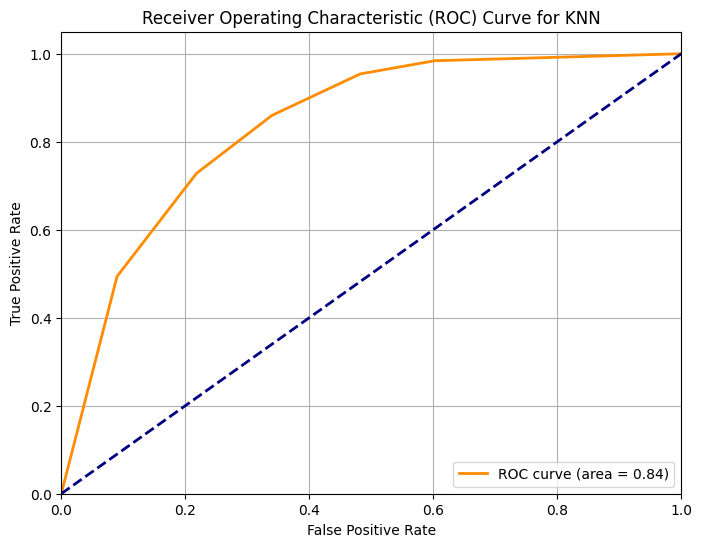

KNN ROC AUC: 0.8372


In [43]:
# prompt: generate the roc curve for the knn traing dara

import matplotlib.pyplot as plt
# Get predicted probabilities for the positive class (class 1) on the test set
y_pred_prob_knn = knn.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"KNN ROC AUC: {roc_auc_knn:.4f}")

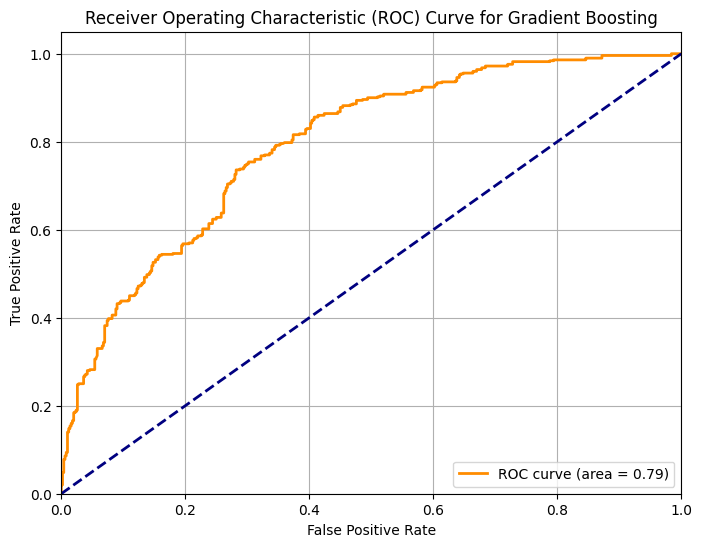

Gradient Boosting ROC AUC: 0.7929


In [44]:
# prompt: prompt: closely analyze my project and i have fitted the grident boosting above generate a roc curev for gradient boosting

import matplotlib.pyplot as plt
# Get predicted probabilities for the positive class (class 1) on the test set
y_pred_prob_gb = gb.predict_proba(x_test)[:, 1]

# Compute ROC curve and ROC area for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Gradient Boosting')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Gradient Boosting ROC AUC: {roc_auc_gb:.4f}")